# Introduction

After gaining an insight into all the variables in the dataset (Please see the process [here]()). In this notebook, we will explore songs, artists, and features of a specific language/country. We have three languages, Mandarin, Korean, and Vietnamese, in the dataset. Let's break it down one by one for the popular songs and artists. Then we will compare all the features of the three languages together.

In [1]:
# import essential libraries
import pandas as pd
import numpy as np

# plots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [2]:
# read in songs.csv
df = pd.read_csv('data/songs.csv')
print(df.shape)
df.head()

(6350, 17)


,name,artists,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,language
0,晴天,Jay Chou,61,0.547,0.567,7.0,-7.295,1.0,0.0242,0.276,0.000548,0.1040,0.3990,137.130,269747.0,2003.0,Mandarin
1,零,Alan Kuo,42,0.494,0.565,3.0,-4.958,0.0,0.0291,0.061,0.000000,0.1210,0.0989,120.026,279893.0,2005.0,Mandarin
2,寶貝 (In a Day),Deserts Chang,44,0.827,0.160,0.0,-12.729,1.0,0.0483,0.887,0.000000,0.1050,0.3880,119.891,145440.0,2006.0,Mandarin
3,雨愛,Rainie Yang,55,0.422,0.657,4.0,-5.274,1.0,0.0292,0.214,0.000000,0.1290,0.2180,159.957,261560.0,2009.0,Mandarin
4,掉了,A-Mei Chang,0,0.547,0.475,1.0,-6.613,1.0,0.0278,0.811,0.000000,0.0722,0.1420,161.965,239560.0,2009.0,Mandarin


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6350 entries, 0 to 6349
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              6350 non-null   object 
 1   artists           6350 non-null   object 
 2   popularity        6350 non-null   int64  
 3   danceability      6350 non-null   float64
 4   energy            6350 non-null   float64
 5   key               6350 non-null   float64
 6   loudness          6350 non-null   float64
 7   mode              6350 non-null   float64
 8   speechiness       6350 non-null   float64
 9   acousticness      6350 non-null   float64
 10  instrumentalness  6350 non-null   float64
 11  liveness          6350 non-null   float64
 12  valence           6350 non-null   float64
 13  tempo             6350 non-null   float64
 14  duration_ms       6350 non-null   float64
 15  year              6308 non-null   float64
 16  language          6350 non-null   object 


# Exploratory Data Analysis

In [4]:
# set up size and color for sns
sns.set(rc={'figure.figsize':(15,4)})
plt.rcParams['figure.dpi'] = 300
plt.style.use('fivethirtyeight')

**Important note:** As we are exploring the songs and artists of each country/language, we will only focus on the top three for each plot. Also, the dataset does not reflect the reality as this dataset is scraped from only several playlists on Spotify. The ranking in each plot is kind of bias due to our small size dataset. Thus, please understand that the analysis below is mainly for learning purpose. 

## Mandarin

In [5]:
# make a subset for mandopop
mandopop_df = df.loc[df['language'] == 'Mandarin']
print(mandopop_df.shape)
mandopop_df.head()

(2039, 17)


,name,artists,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,language
0,晴天,Jay Chou,61,0.547,0.567,7.0,-7.295,1.0,0.0242,0.276,0.000548,0.1040,0.3990,137.130,269747.0,2003.0,Mandarin
1,零,Alan Kuo,42,0.494,0.565,3.0,-4.958,0.0,0.0291,0.061,0.000000,0.1210,0.0989,120.026,279893.0,2005.0,Mandarin
2,寶貝 (In a Day),Deserts Chang,44,0.827,0.160,0.0,-12.729,1.0,0.0483,0.887,0.000000,0.1050,0.3880,119.891,145440.0,2006.0,Mandarin
3,雨愛,Rainie Yang,55,0.422,0.657,4.0,-5.274,1.0,0.0292,0.214,0.000000,0.1290,0.2180,159.957,261560.0,2009.0,Mandarin
4,掉了,A-Mei Chang,0,0.547,0.475,1.0,-6.613,1.0,0.0278,0.811,0.000000,0.0722,0.1420,161.965,239560.0,2009.0,Mandarin


### Songs

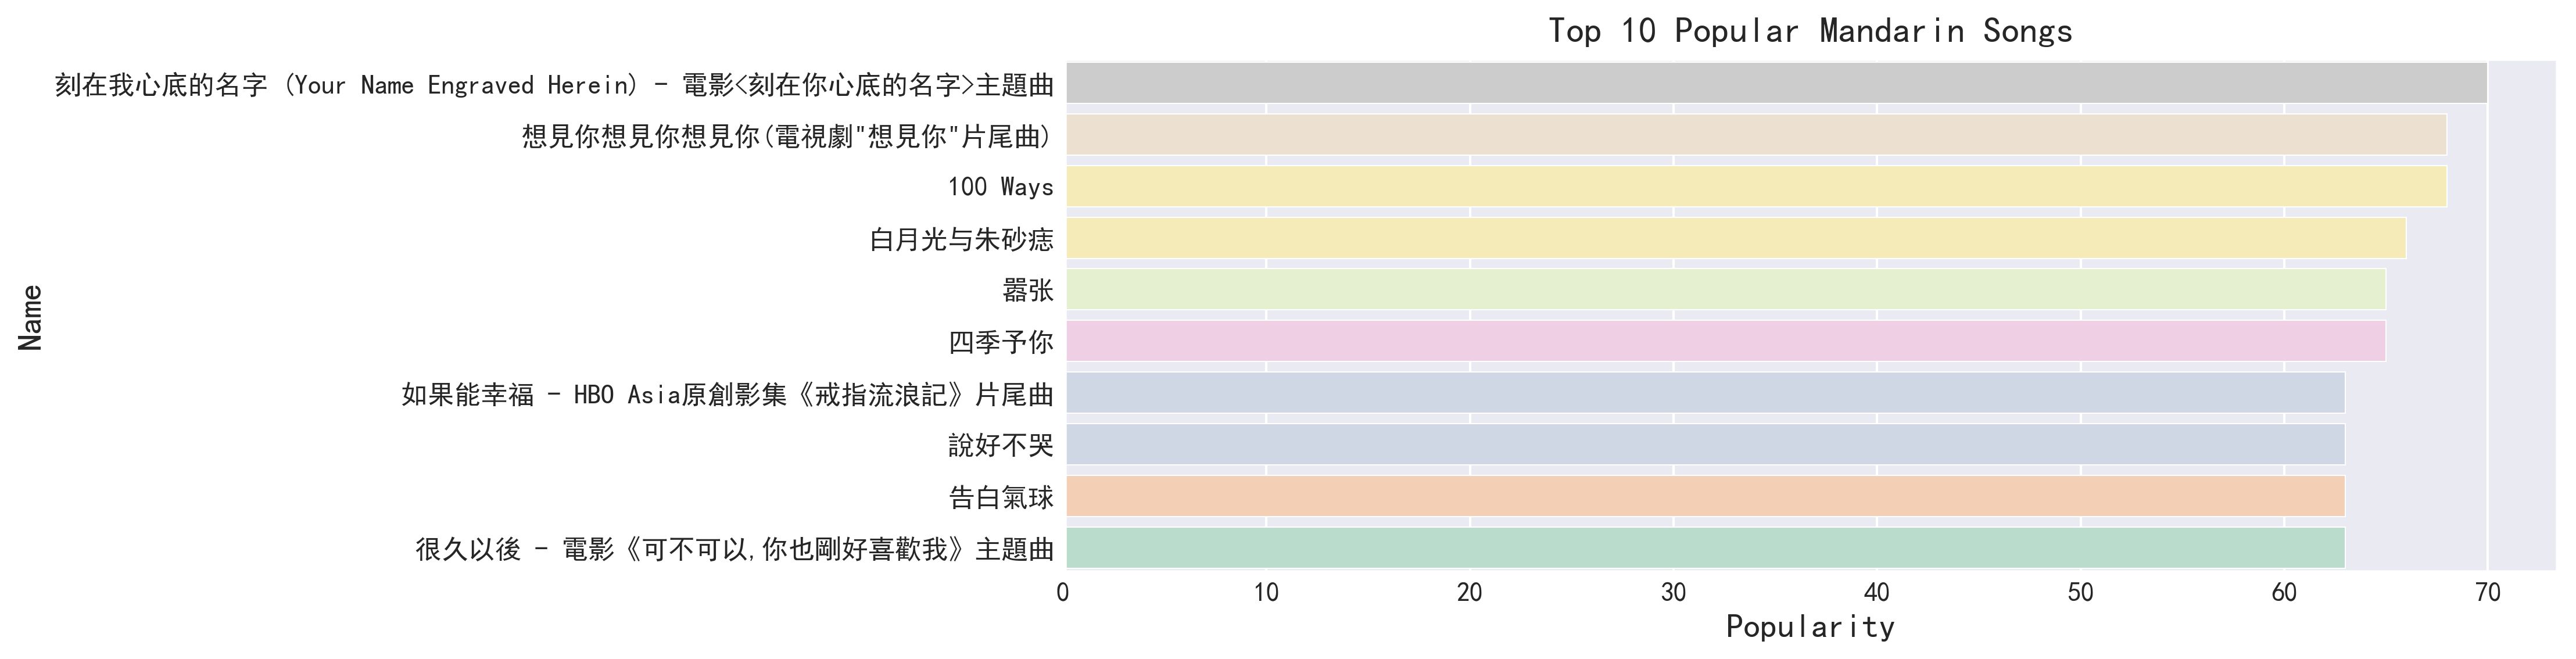

In [65]:
# top 10 popular songs in mandarin
mandopop_songs = mandopop_df.groupby('name')['popularity'].mean().sort_values(ascending=False)[:10]
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']}) 
sns.barplot(x=mandopop_songs, y=mandopop_songs.index, orient = 'h', palette='Pastel2_r')
plt.title('Top 10 Popular Mandarin Songs', fontsize=15)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Name', fontsize=14)
plt.tight_layout()

I have listened to 刻在我心底的名字 and 想见你想见你想见你. The third song is kind of new to me. After checking it out, I learned that even the third song in the chart is not in Mandarin, the artist of the song is Jackson Wang, a famous Hong Kong rapper.

### Artist(s)

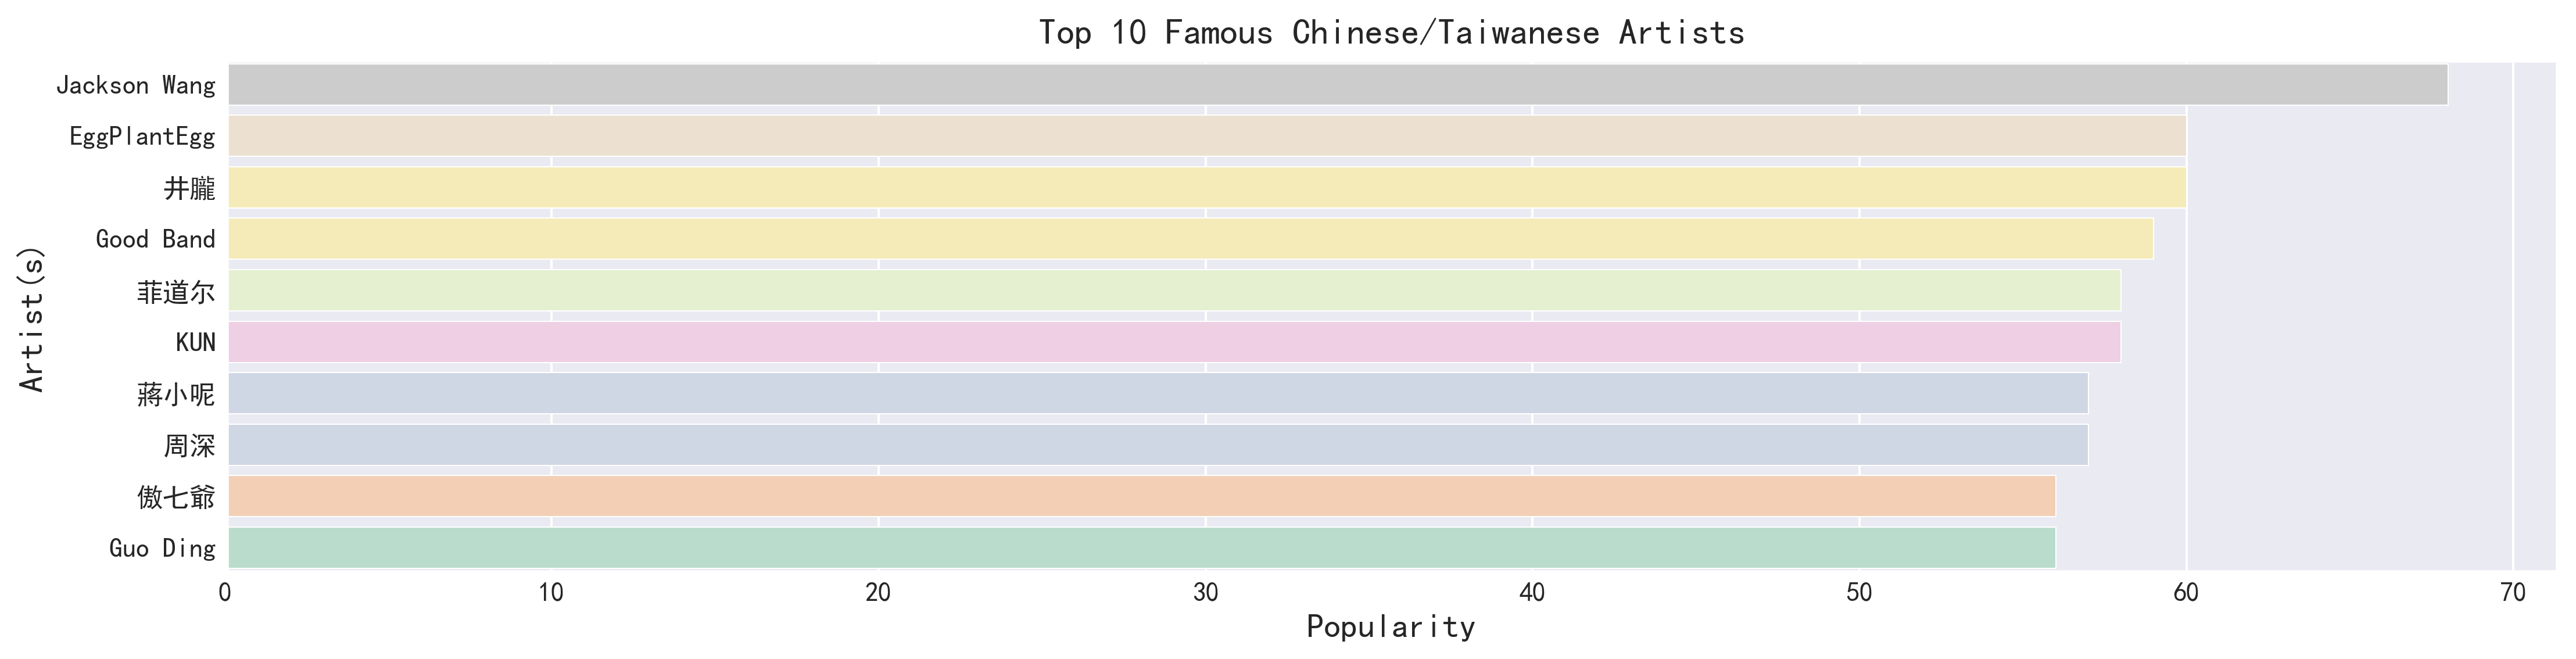

In [66]:
# top 10 popular Chinese/Taiwanese artists
mandopop_artists = mandopop_df.groupby('artists')['popularity'].mean().sort_values(ascending=False)[:10]
sns.barplot(x=mandopop_artists, y=mandopop_artists.index, orient = 'h', palette='Pastel2_r')
plt.title('Top 10 Famous Chinese/Taiwanese Artists', fontsize=15)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Artist(s)', fontsize=14)
plt.tight_layout()

As mentioned above, Jackson Wang is very famous across Asia, so we are not even suprised to see his name here. I've known EggPlantEgg as they are also a famous Taiwanese band. I recently get to know 井朧 after coincidentally listening to 不刪. It is sooo good! Highly recommended! 

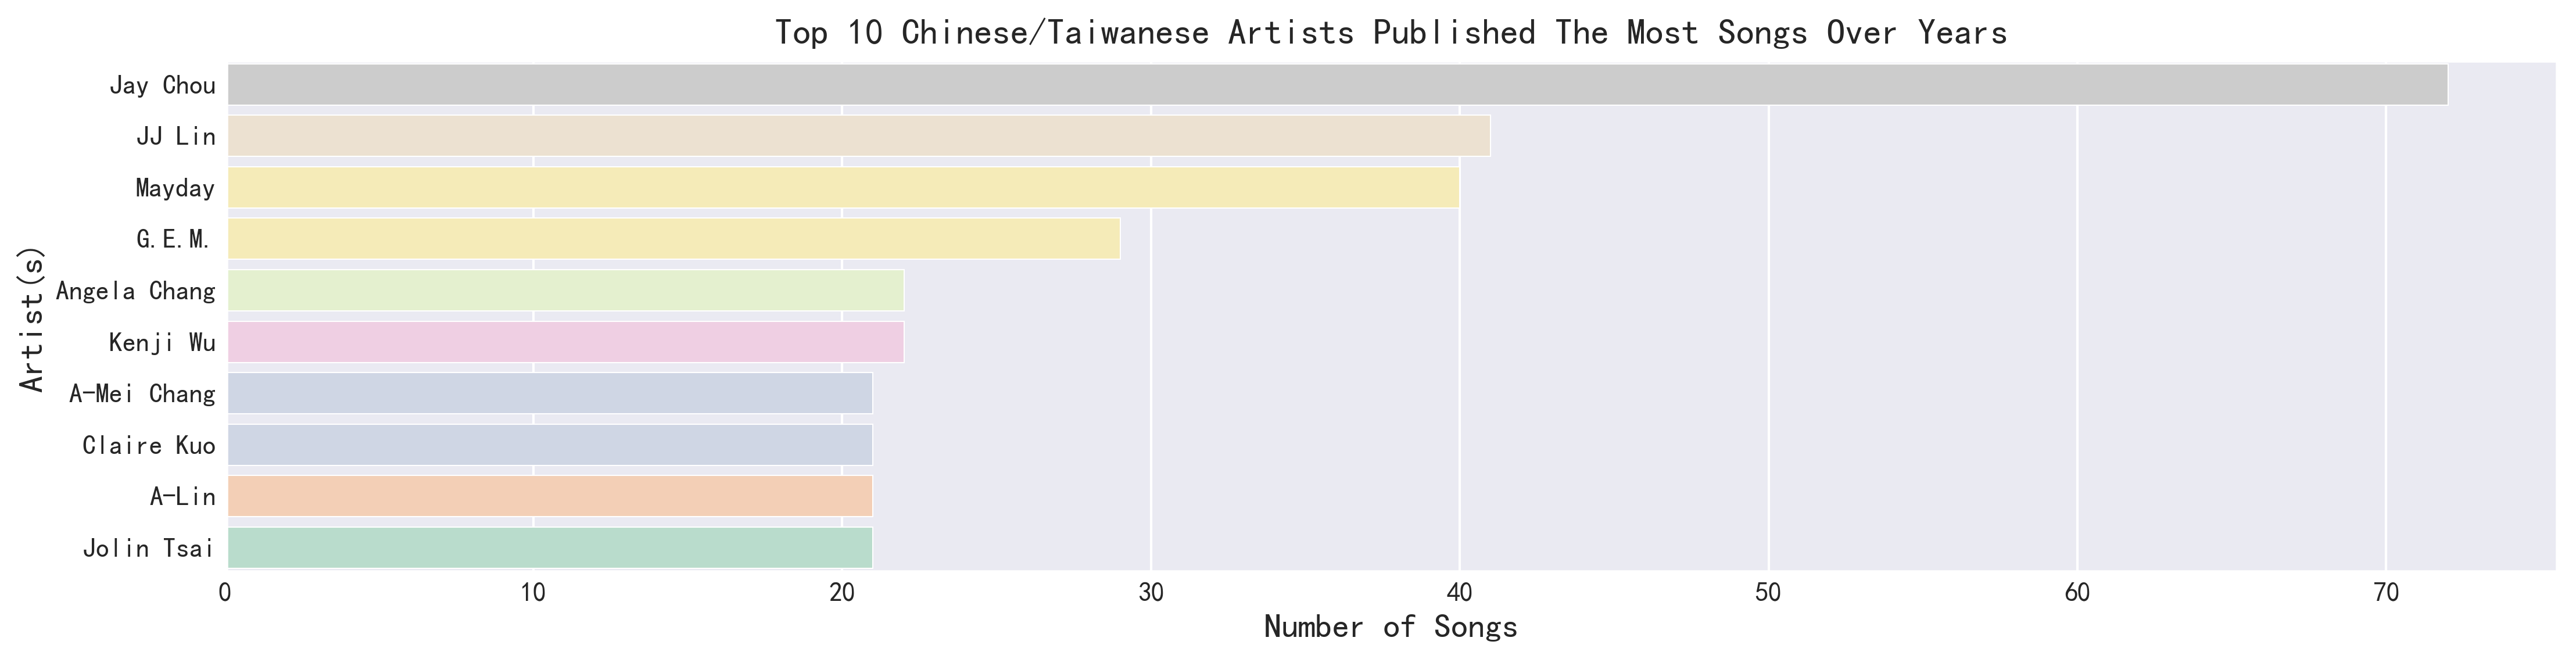

In [67]:
# top 10 Chinese/Taiwanese artists with most songs over the years
mandopop_artists_songs = mandopop_df.groupby('artists')['year'].count().sort_values(ascending=False)[:10]
sns.barplot(x=mandopop_artists_songs, y=mandopop_artists_songs.index, orient = 'h', palette='Pastel2_r')
plt.title('Top 10 Chinese/Taiwanese Artists Published The Most Songs Over Years', fontsize=15)
plt.xlabel('Number of Songs', fontsize=14)
plt.ylabel('Artist(s)', fontsize=14)
plt.tight_layout()

Jay Chou, JJ Lin, and Mayday are extremely famous across Asia. They are all my favourite artists when it comes to Mandopop. Fun fact, I became a Chinese learner after listening to a song written by Jay Chou.

## Korean

In [9]:
# make a subset for kpop
kpop_df = df.loc[df['language'] == 'Korean'].reset_index(drop=True)
print(kpop_df.shape)
kpop_df.head()

(2274, 17)


,name,artists,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,language
0,"How can I love the heartbreak, you`re the one ...",AKMU,12,0.520,0.248,5.0,-8.675,1.0,0.0355,0.910,0.000001,0.118,0.228,129.205,290096.0,2019.0,Korean
1,All about you,TAEYEON,67,0.531,0.287,9.0,-7.091,1.0,0.0364,0.915,0.000000,0.118,0.491,135.550,209482.0,2019.0,Korean
2,Can You See My Heart,HEIZE,65,0.398,0.165,9.0,-10.715,1.0,0.0354,0.885,0.000000,0.102,0.125,134.808,225786.0,2019.0,Korean
3,At the end,CHUNG HA,55,0.618,0.405,11.0,-5.808,1.0,0.0299,0.896,0.000000,0.103,0.222,133.909,224284.0,2019.0,Korean
4,All with You,TAEYEON,56,0.247,0.410,6.0,-5.725,1.0,0.0331,0.756,0.000003,0.127,0.125,62.910,233940.0,2016.0,Korean


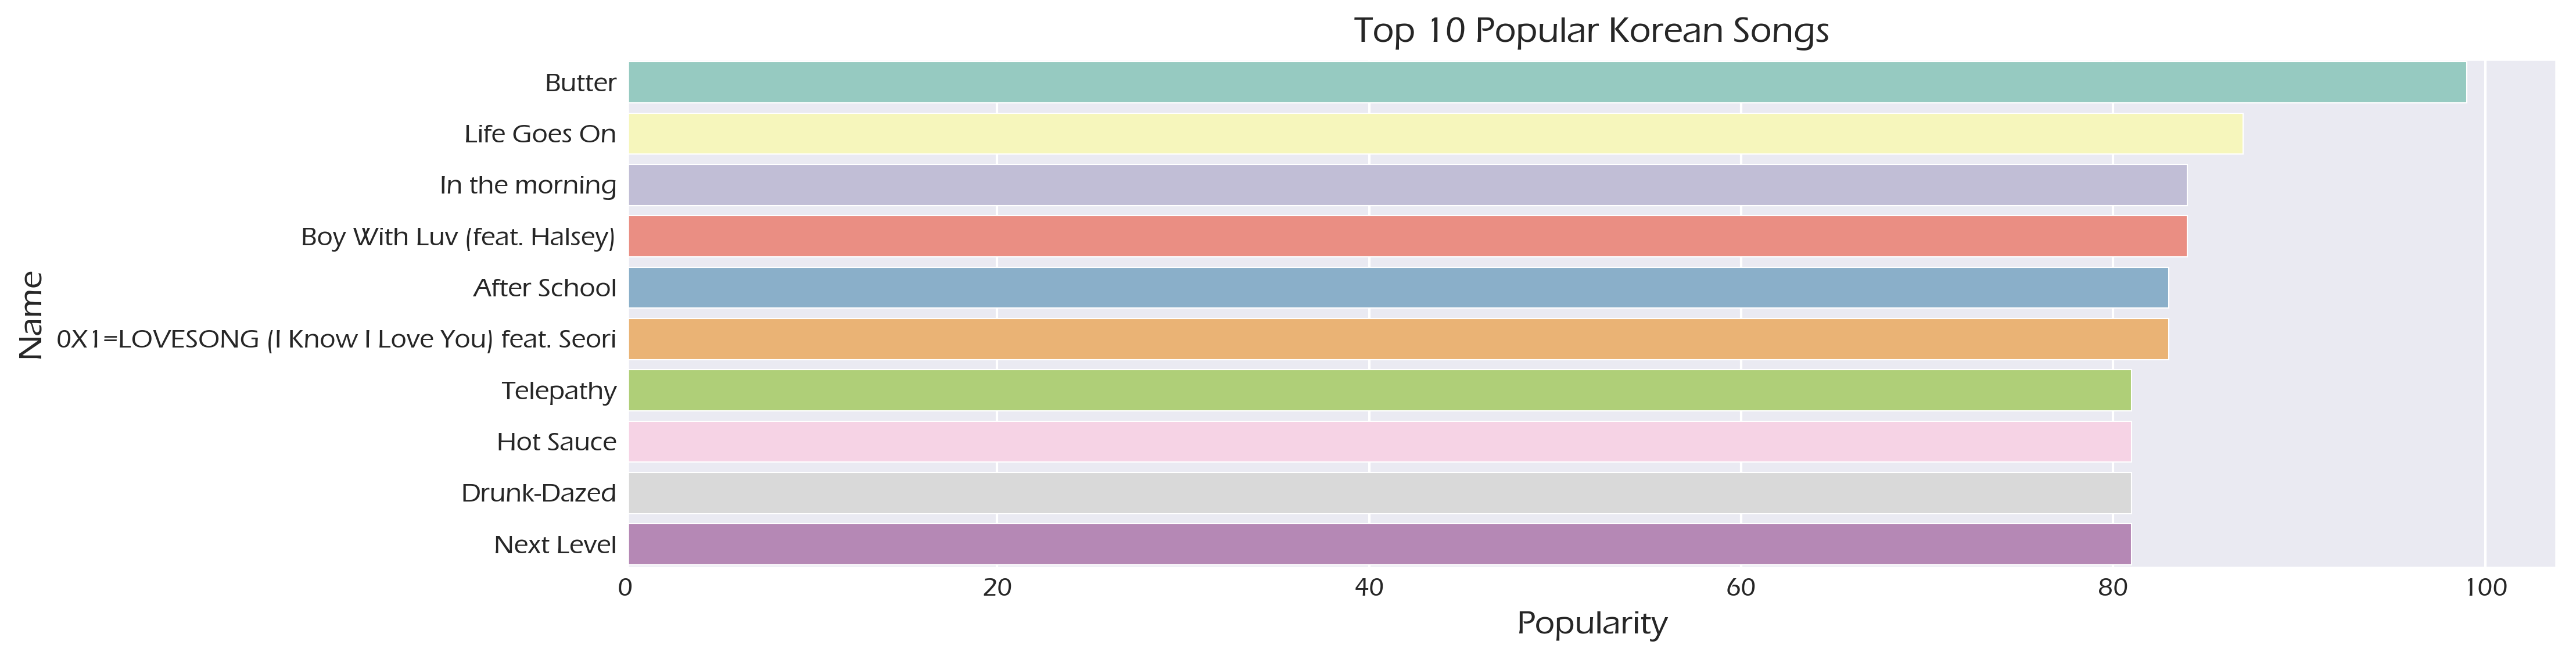

In [68]:
# top 10 popular songs in Korean
kpop_songs = kpop_df.groupby('name')['popularity'].mean().sort_values(ascending=False)[:10]
sns.set_style("darkgrid",{"font.sans-serif":'Eras Medium ITC'})
sns.barplot(x=kpop_songs, y=kpop_songs.index, orient = 'h', palette='Set3')
plt.title('Top 10 Popular Korean Songs', fontsize=15)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Name', fontsize=14)
plt.tight_layout()

Butter and Life Goes On are BTS's songs. I believe that BTS is not only famous in Asia, but also in the U.S. and other Europe countries. The third song is ITZY's song. ITZY is quite famous as well!

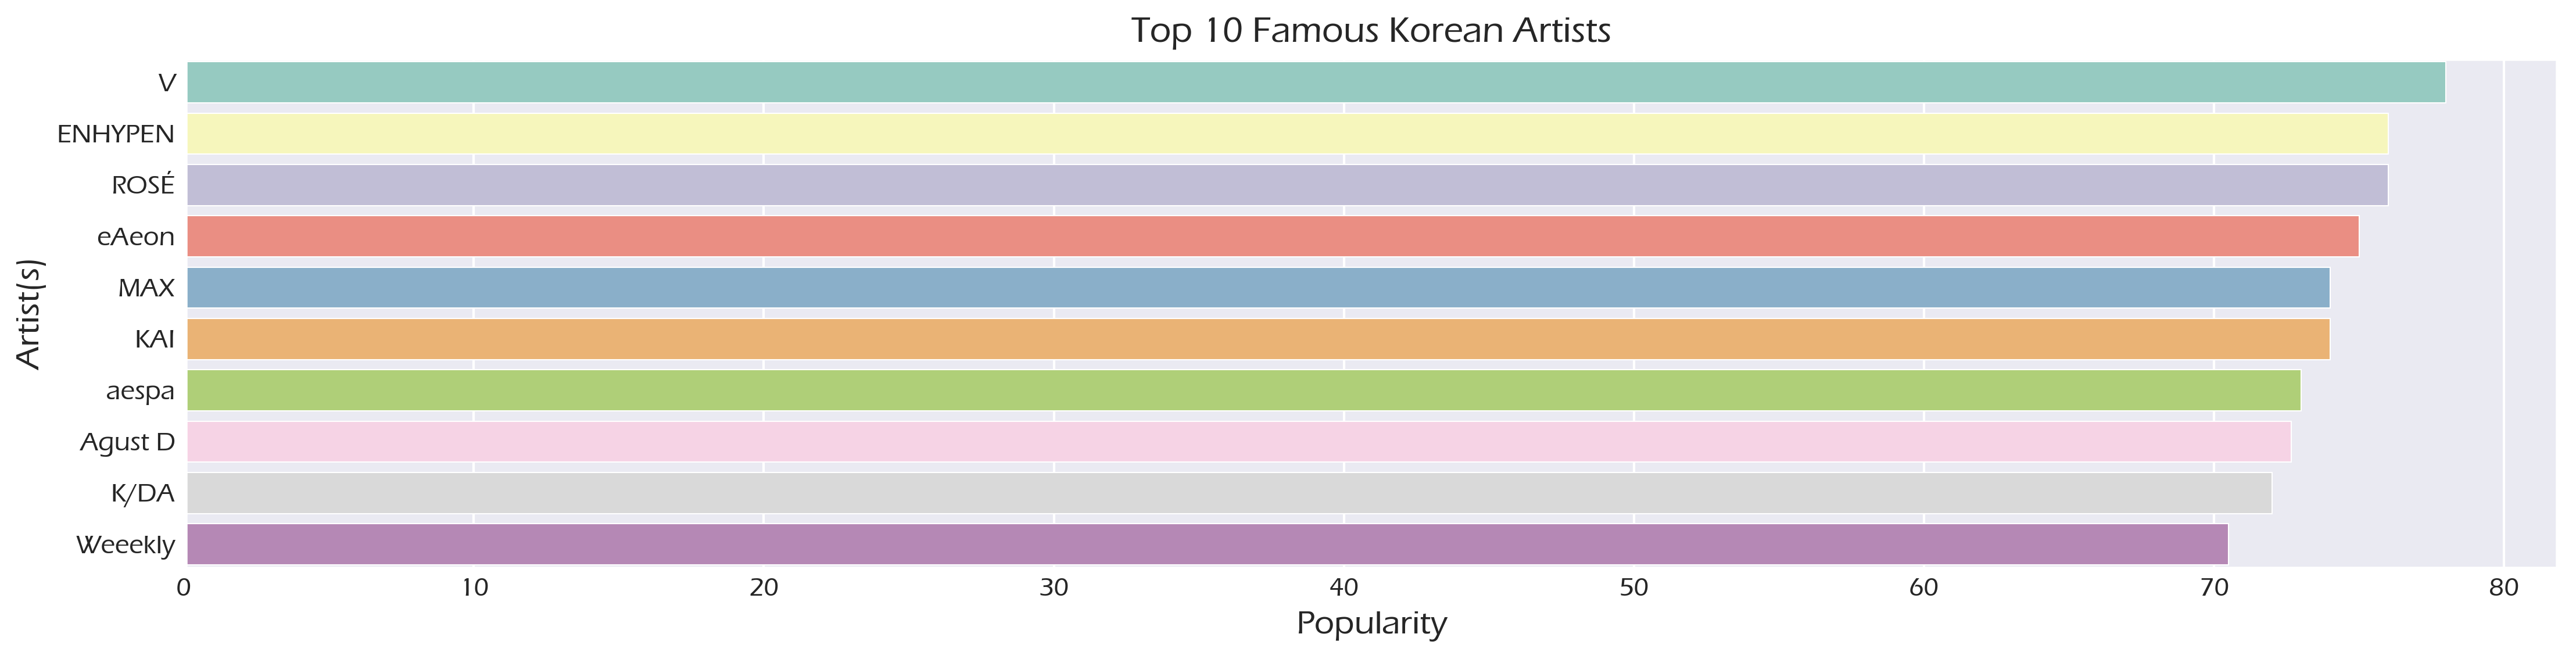

In [69]:
# top 10 popular Korean artists
kpop_artists = kpop_df.groupby('artists')['popularity'].mean().sort_values(ascending=False)[:10]
sns.barplot(x=kpop_artists, y=kpop_artists.index, orient = 'h', palette='Set3')
plt.title('Top 10 Famous Korean Artists', fontsize=15)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Artist(s)', fontsize=14)
plt.tight_layout()

V, ENHYPEN, and ROSÉ are in the top three famous Korean Artists. I've listened to ROSÉ, but not V and ENHYPEN.

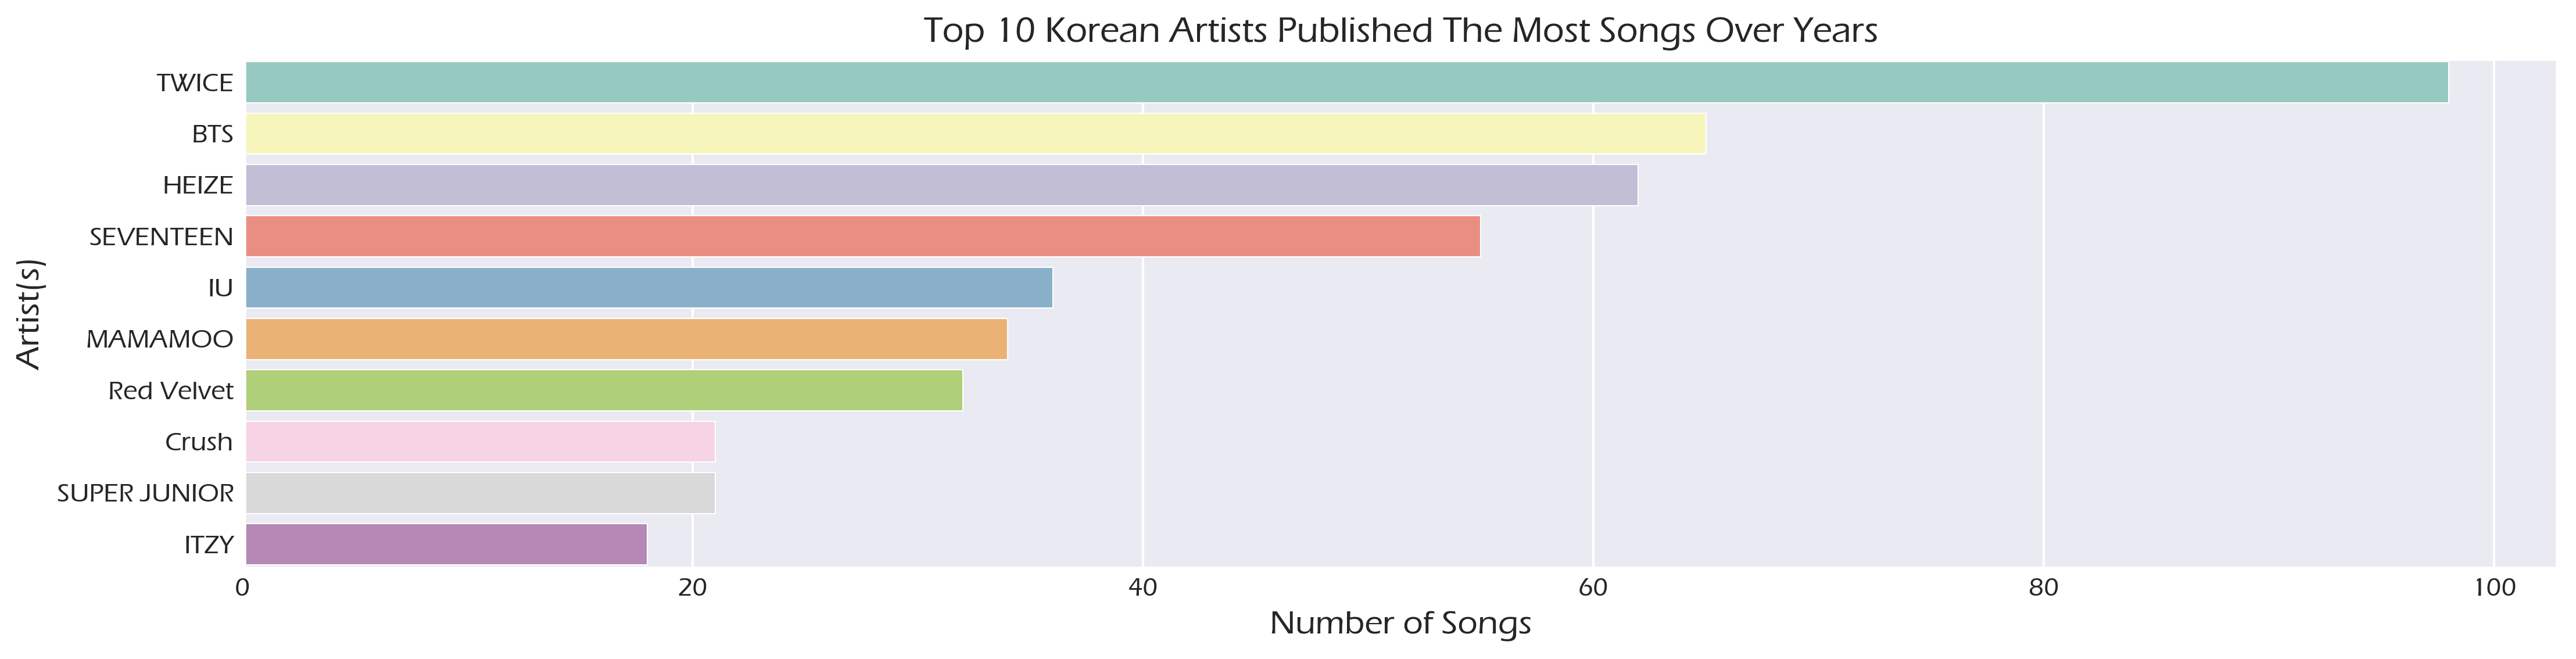

In [70]:
# top 10 Korean artists with most songs over the years
kpop_artists_songs = kpop_df.groupby('artists')['year'].count().sort_values(ascending=False)[:10]
sns.barplot(x=kpop_artists_songs, y=kpop_artists_songs.index, orient = 'h', palette='Set3')
plt.title('Top 10 Korean Artists Published The Most Songs Over Years', fontsize=15)
plt.xlabel('Number of Songs', fontsize=14)
plt.ylabel('Artist(s)', fontsize=14)
plt.tight_layout()

TWICE, BTS, and HEIZE are all the famous artists in Korea. Even though Heize is not a band, she is a talented song writer and singer. If one wants to get to know Heize, I suggest that he/she should listen to "*We don't talk together*".

## Vietnamese

In [72]:
# make a subset for vpop
vpop_df = df.loc[df['language'] == 'Vietnamese'].reset_index(drop=True)
print(vpop_df.shape)
vpop_df.head()

(2037, 17)


,name,artists,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,language
0,Em Dạo Này,Ngọt,45,0.417,0.356,A,-8.747,Major,0.0351,0.752,0.000000,0.1940,0.341,158.112,201828.0,2017.0,Vietnamese
1,Đâu Cần Một Bài Ca Tình Yêu,Tien Tien,49,0.524,0.663,B,-5.473,Major,0.0729,0.692,0.000085,0.0824,0.568,93.381,195514.0,2019.0,Vietnamese
2,Chờ Anh Nhé (feat. Hoang Rob),Hoang Dung,48,0.409,0.353,C,-7.286,Major,0.0263,0.763,0.000000,0.1130,0.157,82.032,322499.0,2018.0,Vietnamese
3,trời giấu trời mang đi,AMEE,50,0.438,0.408,"D♯,E♭",-9.857,Major,0.0705,0.688,0.000000,0.1210,0.373,92.053,253500.0,2020.0,Vietnamese
4,SAY,Lena,41,0.709,0.388,"G♯,A♭",-6.058,Major,0.3430,0.662,0.000000,0.0974,0.712,76.787,177039.0,2020.0,Vietnamese


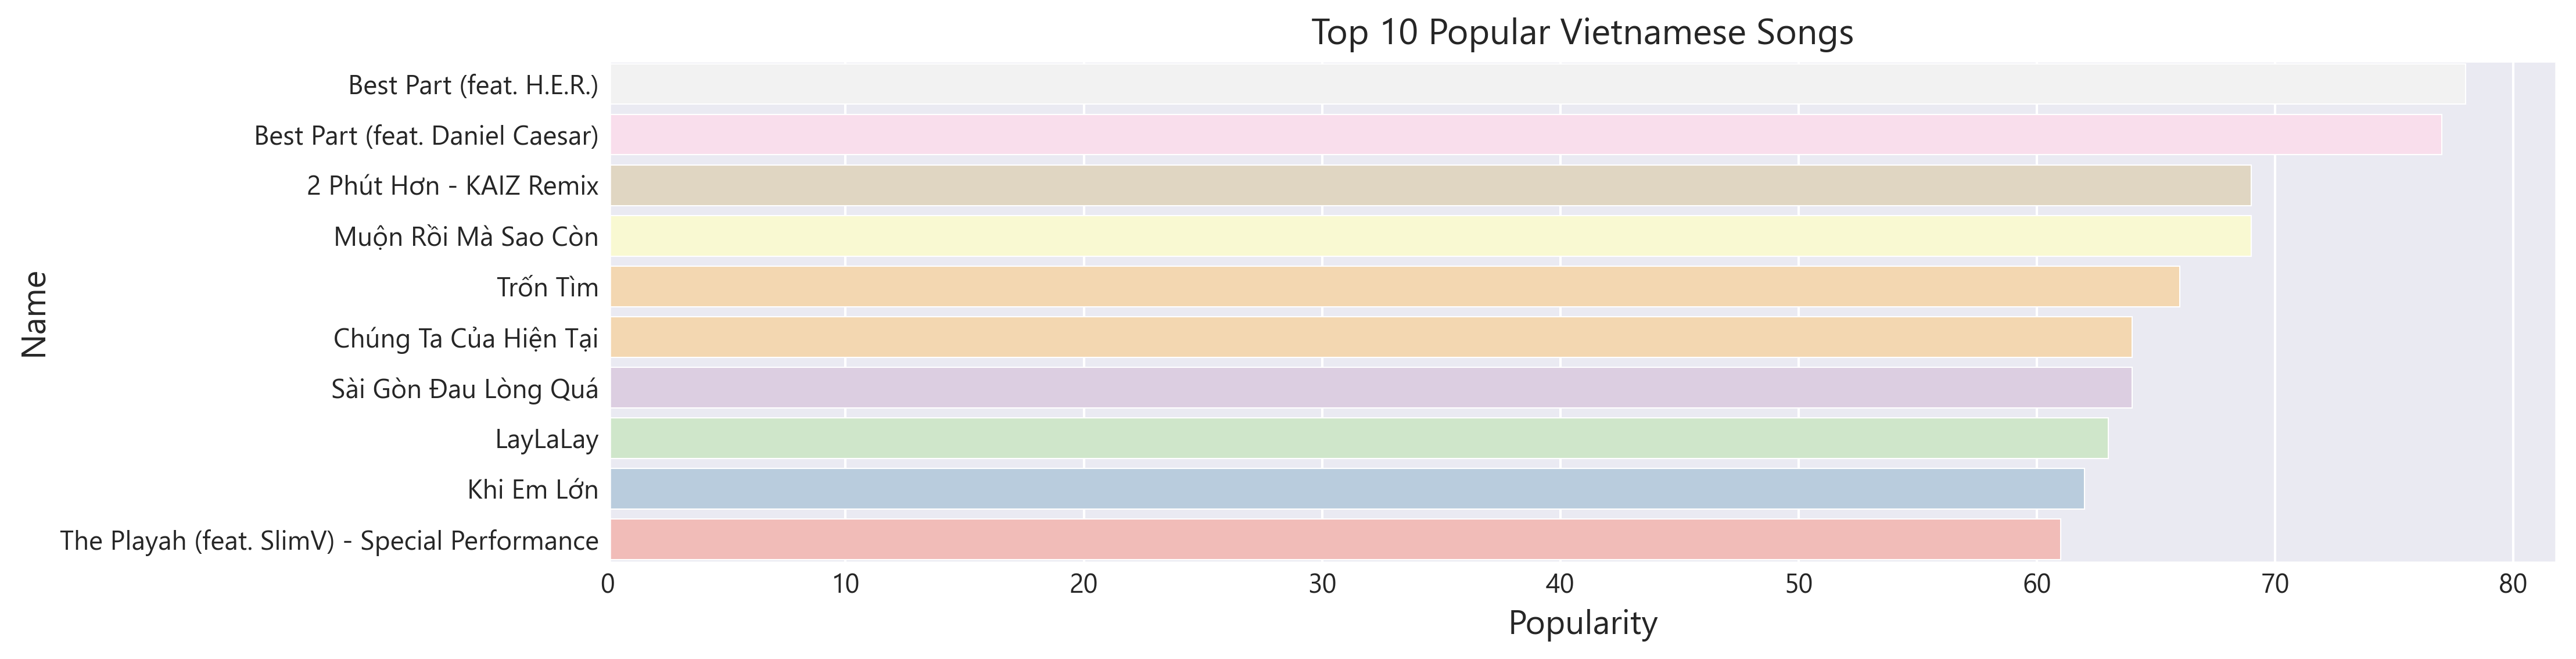

In [73]:
# top 10 popular songs in Vietnamese
vpop_songs = vpop_df.groupby('name')['popularity'].mean().sort_values(ascending=False)[:10]
sns.set_style("darkgrid",{"font.sans-serif":'Segoe UI'})
sns.barplot(x=vpop_songs, y=vpop_songs.index, orient = 'h', palette='Pastel1_r')
plt.title('Top 10 Popular Vietnamese Songs', fontsize=15)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Name', fontsize=14)
plt.tight_layout()

There are two songs that are not Vietnamese. This happened because we scraped metadata from various playlists generated by the Spotify users. It's alright. Let's remove it quickly!

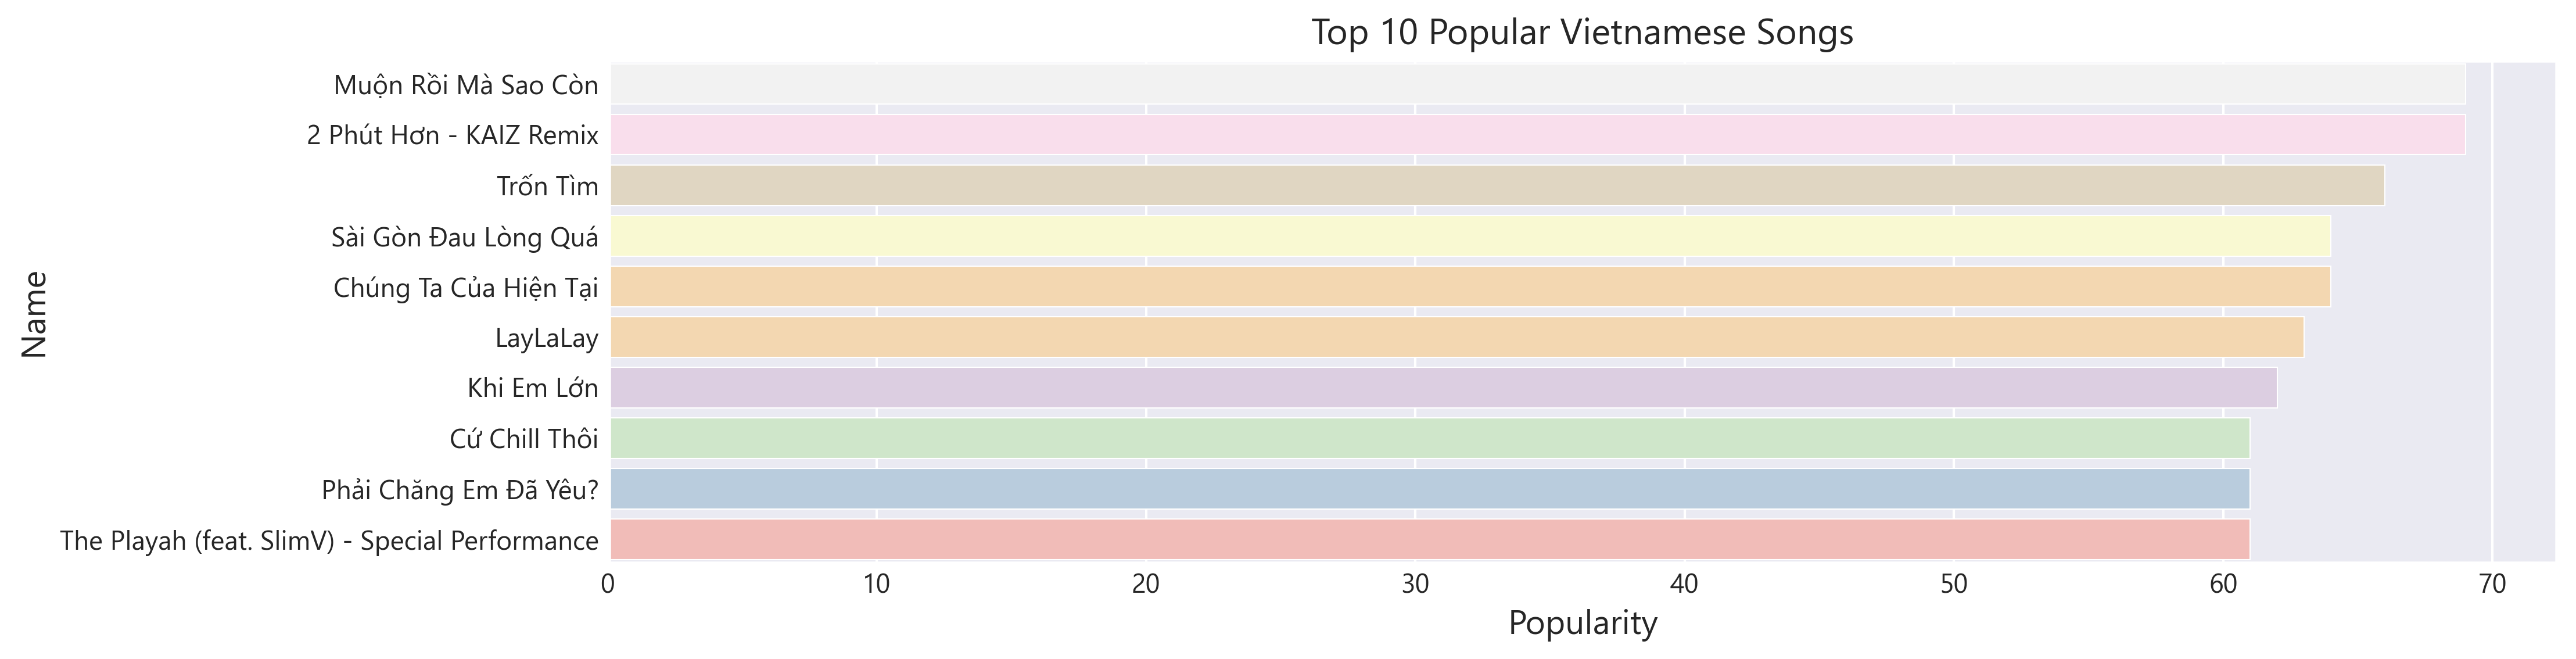

In [74]:
# drop those two songs
vpop_df = vpop_df.loc[(vpop_df['name'] != 'Best Part (feat. H.E.R.)') & (vpop_df['name'] != 'Best Part (feat. Daniel Caesar)')]

# plot
vpop_songs = vpop_df.groupby('name')['popularity'].mean().sort_values(ascending=False)[:10]
sns.barplot(x=vpop_songs, y=vpop_songs.index, orient = 'h', palette='Pastel1_r')
plt.title('Top 10 Popular Vietnamese Songs', fontsize=15)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Name', fontsize=14)
plt.tight_layout()

It looks good now!! I haven't listened to the top three songs; however, I've binge listening to the fourth song, "*Sài Gòn Đau Lòng Quá*", for months. It's a song talks about a couple who just broke up and wanted to forget every single memory they had in Sai Gon.

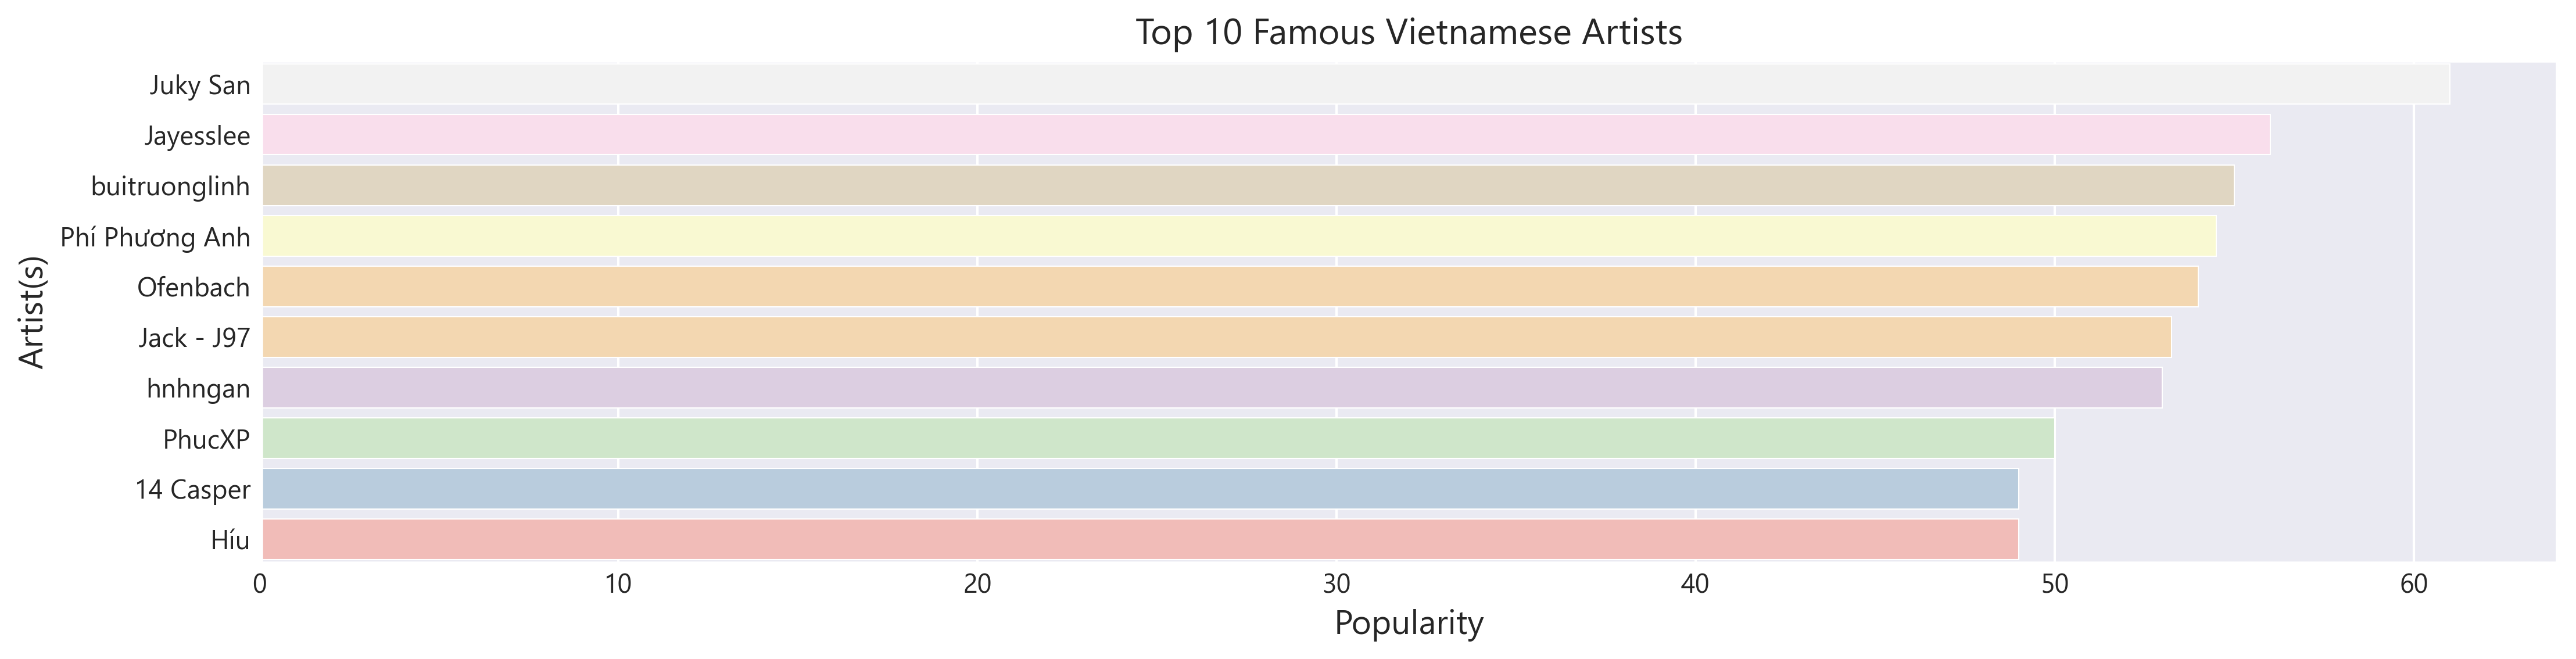

In [75]:
# top 10 popular Vietnamese artists
vpop_artists = vpop_df.groupby('artists')['popularity'].mean().sort_values(ascending=False)[:10]
sns.barplot(x=vpop_artists, y=vpop_artists.index, orient = 'h', palette='Pastel1_r')
plt.title('Top 10 Famous Vietnamese Artists', fontsize=15)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Artist(s)', fontsize=14)
plt.tight_layout()

I've listened to some of Juky San's songs, but not Jayesslee and buitruonglinh. 

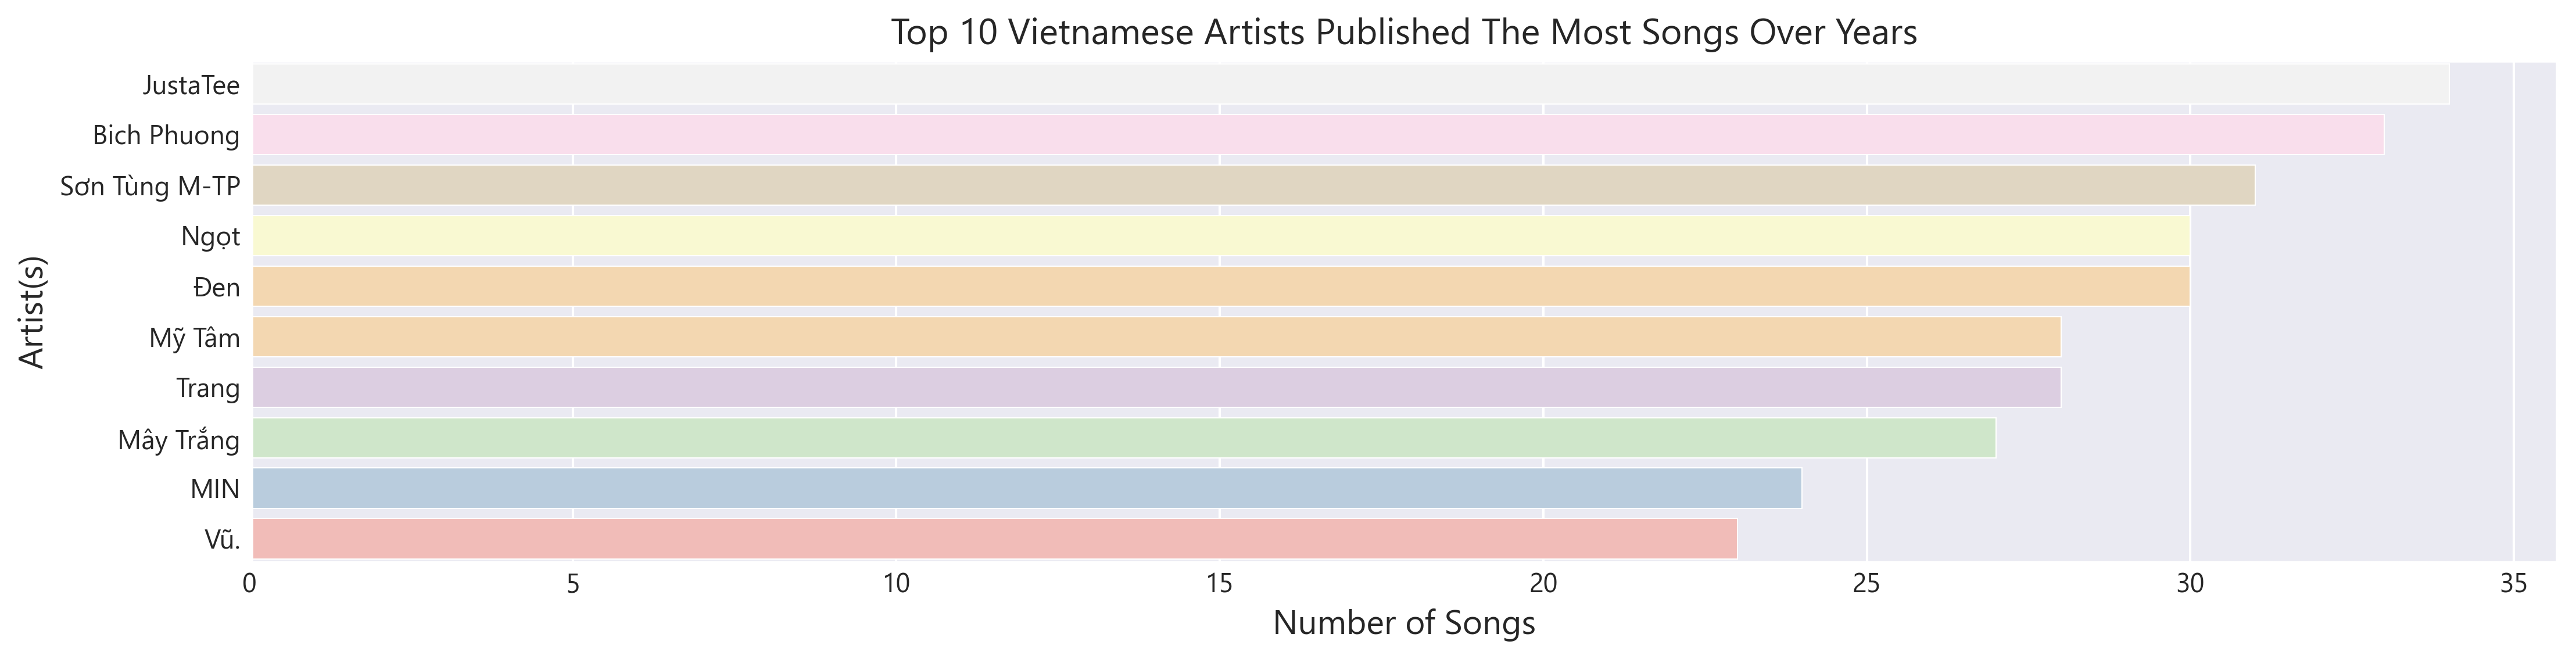

In [76]:
# top 10 Vietnamese artists with most songs over the years
vpop_artists_songs = vpop_df.groupby('artists')['year'].count().sort_values(ascending=False)[:10]
sns.barplot(x=vpop_artists_songs, y=vpop_artists_songs.index, orient = 'h', palette='Pastel1_r')
plt.title('Top 10 Vietnamese Artists Published The Most Songs Over Years', fontsize=15)
plt.xlabel('Number of Songs', fontsize=14)
plt.ylabel('Artist(s)', fontsize=14)
plt.tight_layout()

Similar to Mandopop and Kpop, I only know the artists that published the most songs over the years better. Perhaps I'm a little old-fashioned. Despite that, JustaTee, Bich Phuong, and Son Tung M-TP are very very famous in Vietnam. I've listened to most of their songs; however, JustaTee is my favourite artirst among three of them.

## Comparisons

In [37]:
# subsets for 3
m = mandopop_df.loc[mandopop_df['year'] >= 2010]
k = kpop_df.loc[kpop_df['year'] >= 2010]
v = vpop_df.loc[vpop_df['year'] >= 2010]

### Danceability
*Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.*

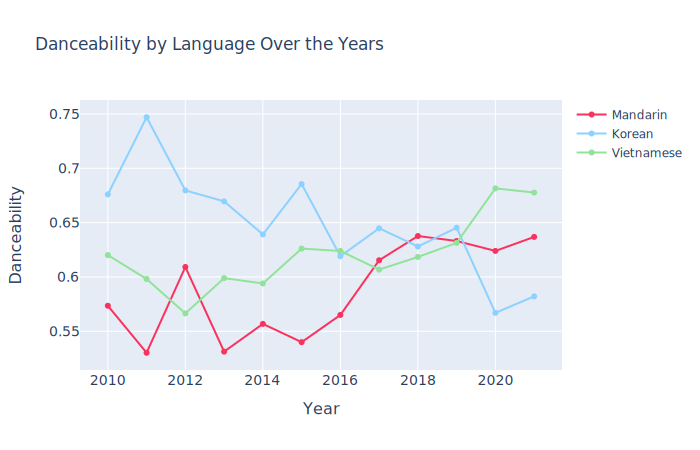

In [53]:
# Line chart - Danceability
md = m.groupby(by='year')['danceability'].mean().reset_index()
kd = k.groupby(by='year')['danceability'].mean().reset_index()
vd = v.groupby(by='year')['danceability'].mean().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=md['year'], 
                         y=md['danceability'],
                         mode='lines+markers',
                         name='Mandarin',
                         line=dict(color='#fa325d', width=2)
                        ))
fig.add_trace(go.Scatter(x=kd['year'], 
                         y=kd['danceability'],
                         mode='lines+markers',
                         name='Korean',
                         line=dict(color='#8cd1ff', width=2)
                        ))
fig.add_trace(go.Scatter(x=vd['year'], 
                         y=vd['danceability'],
                         mode='lines+markers',
                         name='Vietnamese',
                         line=dict(color='#91e399', width=2)
                        ))
fig.update_layout(
    title='Danceability by Language Over the Years',
    yaxis=dict(
        title='Danceability',
        titlefont_size=16,
        tickfont_size=14,
    ),
    xaxis=dict(
        title='Year',
        titlefont_size=16,
        tickfont_size=14,
    )
)
fig.show('svg')

In 2010s, Kpop songs were more danceable compared to Mandopop songs and Vpop songs. However, things become differently as in 2020s, Kpop songs are the least danceable. Instead, Vpop and Mandopop songs have more danceability. 

### Energy
*Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.*

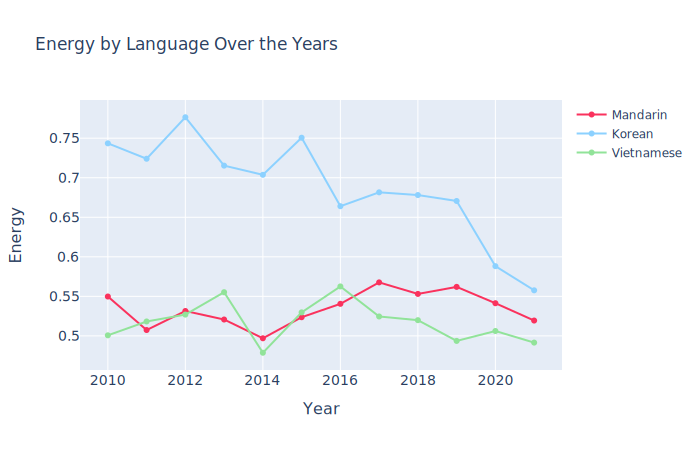

In [52]:
# Line chart - Energy
me = m.groupby(by='year')['energy'].mean().reset_index()
ke = k.groupby(by='year')['energy'].mean().reset_index()
ve = v.groupby(by='year')['energy'].mean().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=me['year'], 
                         y=me['energy'],
                         mode='lines+markers',
                         name='Mandarin',
                         line=dict(color='#fa325d', width=2)
                        ))
fig.add_trace(go.Scatter(x=ke['year'], 
                         y=ke['energy'],
                         mode='lines+markers',
                         name='Korean',
                         line=dict(color='#8cd1ff', width=2)
                        ))
fig.add_trace(go.Scatter(x=ve['year'], 
                         y=ve['energy'],
                         mode='lines+markers',
                         name='Vietnamese',
                         line=dict(color='#91e399', width=2)
                        ))
fig.update_layout(
    title='Energy by Language Over the Years',
    yaxis=dict(
        title='Energy',
        titlefont_size=16,
        tickfont_size=14,
    ),
    xaxis=dict(
        title='Year',
        titlefont_size=16,
        tickfont_size=14,
    )
)
fig.show('svg')

In 2010s, most of Kpop songs were fast and loud. In contrast, most Mandopop and Vpop songs were soft and slow. In 2020s, the trend becomes different as all Kpop, Mandopop, and Vpop songs tend to become slower.

### Key
*Key is the major or minor scale around which a piece of music revolves.*

In [21]:
#map the numeric values of key to notes
key_mapping = {0: 'C', 1: 'C♯,D♭', 2: 'D', 3: 'D♯,E♭', 4: 'E', 5: 'F', 6: 'F♯,G♭', 7: 'G', 8: 'G♯,A♭', 9: 'A', 10: 'A♯,B♭', 11: 'B'}
df['key'] = df['key'].map(key_mapping)

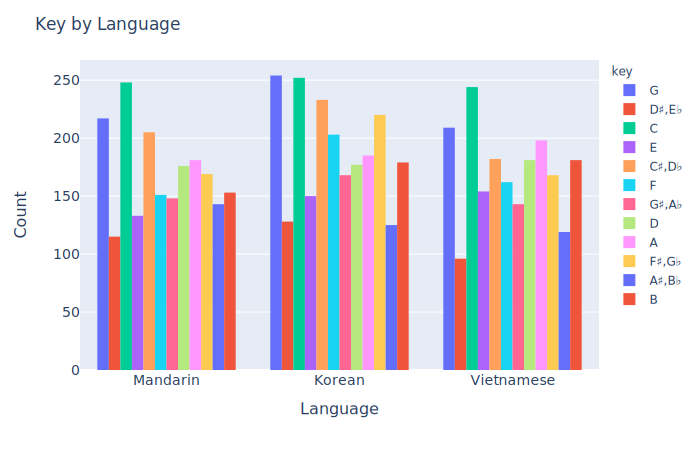

In [51]:
fig = px.histogram(df, x='language', color='key', barmode='group')
fig.update_layout(
    title='Key by Language',
    yaxis=dict(
        title='Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    xaxis=dict(
        title='Language',
        titlefont_size=16,
        tickfont_size=14,
    )
)
fig.show('svg')

We can see that most Mandopop, Kpop, and Vpop songs are primarily in G or C major/minor.

### Loudness
*The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.*

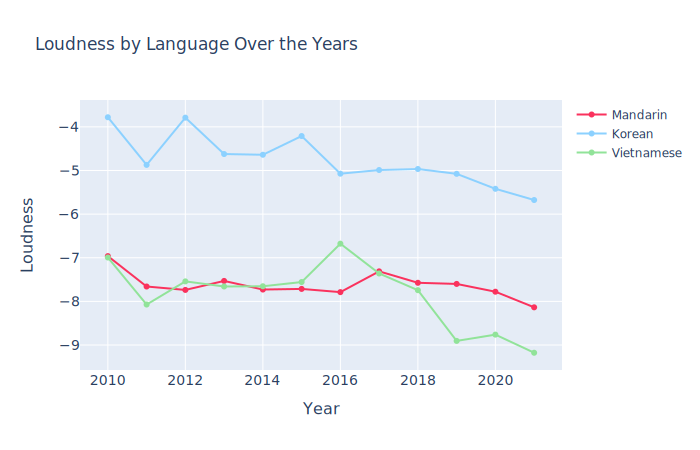

In [50]:
# Line chart - Loudness
ml = m.groupby(by='year')['loudness'].mean().reset_index()
kl = k.groupby(by='year')['loudness'].mean().reset_index()
vl = v.groupby(by='year')['loudness'].mean().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=ml['year'], 
                         y=ml['loudness'],
                         mode='lines+markers',
                         name='Mandarin',
                         line=dict(color='#fa325d', width=2)
                        ))
fig.add_trace(go.Scatter(x=kl['year'], 
                         y=kl['loudness'],
                         mode='lines+markers',
                         name='Korean',
                         line=dict(color='#8cd1ff', width=2)
                        ))
fig.add_trace(go.Scatter(x=vl['year'], 
                         y=vl['loudness'],
                         mode='lines+markers',
                         name='Vietnamese',
                         line=dict(color='#91e399', width=2)
                        ))
fig.update_layout(
    title='Loudness by Language Over the Years',
    yaxis=dict(
        title='Loudness',
        titlefont_size=16,
        tickfont_size=14,
    ),
    xaxis=dict(
        title='Year',
        titlefont_size=16,
        tickfont_size=14,
    )
)
fig.show('svg')

As mentioned above, most Kpop songs were loud and fast in 2010s, whereas Mandopop and Vpop songs were more likely slow and soft. In 2020s, all of the three music become more slower and soft in general.

### Mode
*Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived.*

In [24]:
# map the binary value of mode to major/minor
mode_mapping = {1.0: "Major", 0.0: "Minor"}
df['mode'] = df['mode'].map(mode_mapping)

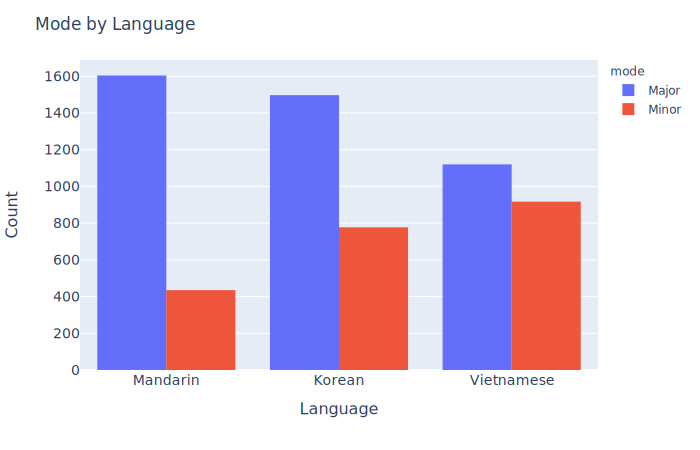

In [49]:
fig = px.histogram(df, x='language', color='mode', barmode='group')
fig.update_layout(
    title='Mode by Language',
    yaxis=dict(
        title='Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    xaxis=dict(
        title='Language',
        titlefont_size=16,
        tickfont_size=14,
    )
)
fig.show('svg')

We can see the pattern here in which most Mandopop, Kpop, and Vpop songs are in major mode. 

### Speechiness
*Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.*

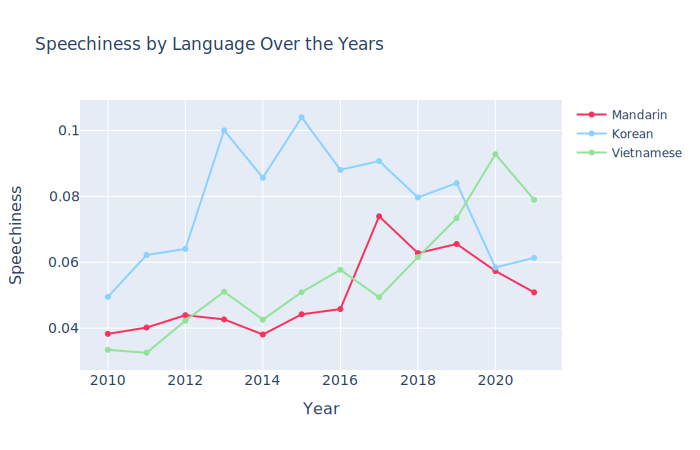

In [48]:
# Line chart - Speechiness
ms = m.groupby(by='year')['speechiness'].mean().reset_index()
ks = k.groupby(by='year')['speechiness'].mean().reset_index()
vs = v.groupby(by='year')['speechiness'].mean().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=ms['year'], 
                         y=ms['speechiness'],
                         mode='lines+markers',
                         name='Mandarin',
                         line=dict(color='#fa325d', width=2)
                        ))
fig.add_trace(go.Scatter(x=ks['year'], 
                         y=ks['speechiness'],
                         mode='lines+markers',
                         name='Korean',
                         line=dict(color='#8cd1ff', width=2)
                        ))
fig.add_trace(go.Scatter(x=vs['year'], 
                         y=vs['speechiness'],
                         mode='lines+markers',
                         name='Vietnamese',
                         line=dict(color='#91e399', width=2)
                        ))
fig.update_layout(
    title='Speechiness by Language Over the Years',
    yaxis=dict(
        title='Speechiness',
        titlefont_size=16,
        tickfont_size=14,
    ),
    xaxis=dict(
        title='Year',
        titlefont_size=16,
        tickfont_size=14,
    )
)
fig.show('svg')

The values for speechiness among the three music that present in this dataset are too small as the highest value is only a little over 0.1. Thus, we can conclude that all of the observations in this dataset are songs, not audio books. As shown above, Kpop songs have a peak in 2015. Perhaps there were more rap songs published in that time? Nevertheless, Vpop took over Kpop's first place in 2020s as hip hop/rap becomes the trend in Vietnam starts from the beginning of 2020.

### Acousticness
*A measure from 0.0 to 1.0 of whether the track is acoustic.*

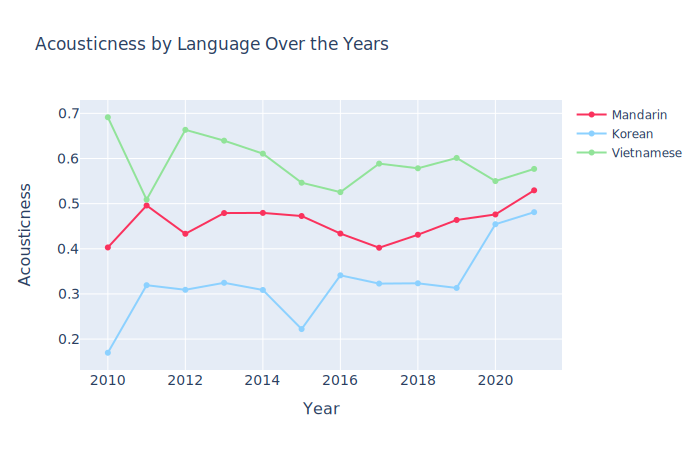

In [47]:
# Line chart - Acousticness
ma = m.groupby(by='year')['acousticness'].mean().reset_index()
ka = k.groupby(by='year')['acousticness'].mean().reset_index()
va = v.groupby(by='year')['acousticness'].mean().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=ma['year'], 
                         y=ma['acousticness'],
                         mode='lines+markers',
                         name='Mandarin',
                         line=dict(color='#fa325d', width=2)
                        ))
fig.add_trace(go.Scatter(x=ka['year'], 
                         y=ka['acousticness'],
                         mode='lines+markers',
                         name='Korean',
                         line=dict(color='#8cd1ff', width=2)
                        ))
fig.add_trace(go.Scatter(x=va['year'], 
                         y=va['acousticness'],
                         mode='lines+markers',
                         name='Vietnamese',
                         line=dict(color='#91e399', width=2)
                        ))
fig.update_layout(
    title='Acousticness by Language Over the Years',
    yaxis=dict(
        title='Acousticness',
        titlefont_size=16,
        tickfont_size=14,
    ),
    xaxis=dict(
        title='Year',
        titlefont_size=16,
        tickfont_size=14,
    )
)
fig.show('svg')

Vpop has maintained its first place over years in the acoustic genre. Mandopop also has done the same in protecting its second place. We can also see that Kpop started in a very low point in 2010; however, it kept growing up over the time and almost catch Mandopop in 2020s. 

### Instrumentalness
*Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.*

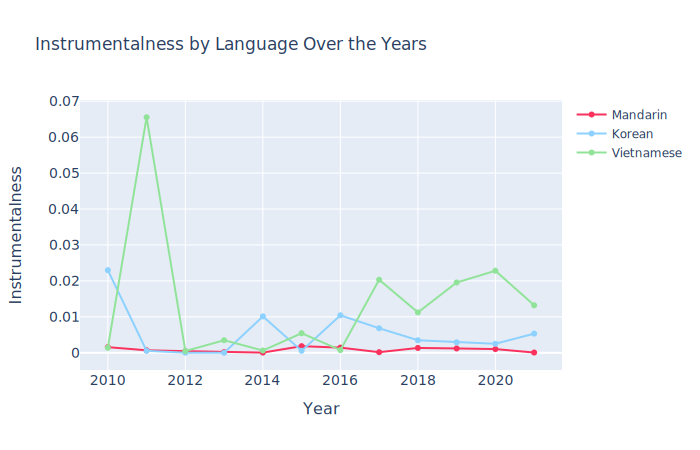

In [46]:
# Line chart - Instrumentalness
mi = m.groupby(by='year')['instrumentalness'].mean().reset_index()
ki = k.groupby(by='year')['instrumentalness'].mean().reset_index()
vi = v.groupby(by='year')['instrumentalness'].mean().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=mi['year'], 
                         y=mi['instrumentalness'],
                         mode='lines+markers',
                         name='Mandarin',
                         line=dict(color='#fa325d', width=2)
                        ))
fig.add_trace(go.Scatter(x=ki['year'], 
                         y=ki['instrumentalness'],
                         mode='lines+markers',
                         name='Korean',
                         line=dict(color='#8cd1ff', width=2)
                        ))
fig.add_trace(go.Scatter(x=vi['year'], 
                         y=vi['instrumentalness'],
                         mode='lines+markers',
                         name='Vietnamese',
                         line=dict(color='#91e399', width=2)
                        ))
fig.update_layout(
    title='Instrumentalness by Language Over the Years',
    yaxis=dict(
        title='Instrumentalness',
        titlefont_size=16,
        tickfont_size=14,
    ),
    xaxis=dict(
        title='Year',
        titlefont_size=16,
        tickfont_size=14,
    )
)
fig.show('svg')

There was a peak in 2011 that indicates Vpop has songs that tend to contain no vocal content. I personally think that this is a flaw in our dataset as it suddenly started from 0 in 2010 to almost 0.07 in 2011, then went down to 0 in 2012. Thus, there should be a song that makes our plot look like this. Once we remove it, it should become normal. Nonetheless, in 2020s, Vpop has more songs that contain less vocal content compared to Mandopop and Kpop.

### Liveness
*Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.*

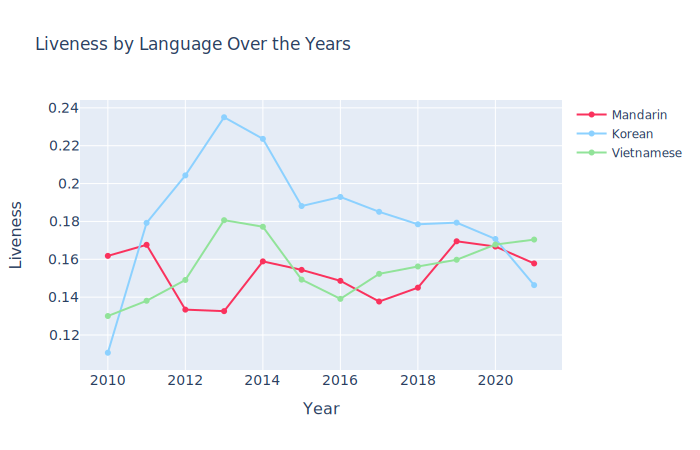

In [42]:
# Line chart - Liveness
mli = m.groupby(by='year')['liveness'].mean().reset_index()
kli = k.groupby(by='year')['liveness'].mean().reset_index()
vli = v.groupby(by='year')['liveness'].mean().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=mli['year'], 
                         y=mli['liveness'],
                         mode='lines+markers',
                         name='Mandarin',
                         line=dict(color='#fa325d', width=2)
                        ))
fig.add_trace(go.Scatter(x=kli['year'], 
                         y=kli['liveness'],
                         mode='lines+markers',
                         name='Korean',
                         line=dict(color='#8cd1ff', width=2)
                        ))
fig.add_trace(go.Scatter(x=vli['year'], 
                         y=vli['liveness'],
                         mode='lines+markers',
                         name='Vietnamese',
                         line=dict(color='#91e399', width=2)
                        ))
fig.update_layout(
    title='Liveness by Language Over the Years',
    yaxis=dict(
        title='Liveness',
        titlefont_size=16,
        tickfont_size=14,
    ),
    xaxis=dict(
        title='Year',
        titlefont_size=16,
        tickfont_size=14,
    )
)
fig.show('svg')

In 2010s, most Korean tracks were performed live as its peak took place in 2013. In 2020s, there are more Vpop songs that are performed live compared to Mandopop and Kpop. 

### Valence
*A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).*

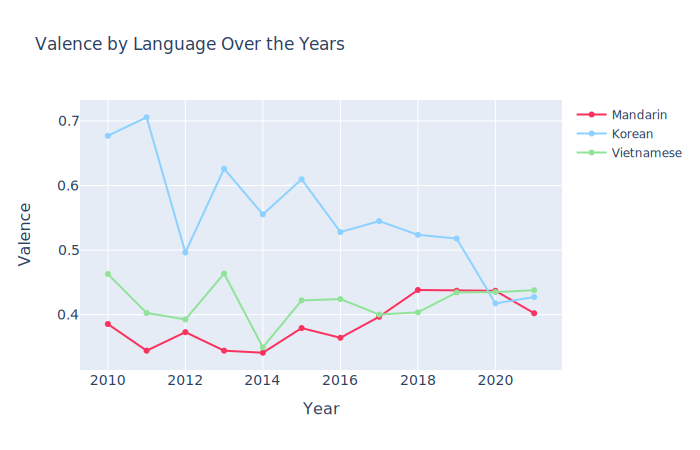

In [43]:
# Line chart - Valence
mv = m.groupby(by='year')['valence'].mean().reset_index()
kv = k.groupby(by='year')['valence'].mean().reset_index()
vv = v.groupby(by='year')['valence'].mean().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=mv['year'], 
                         y=mv['valence'],
                         mode='lines+markers',
                         name='Mandarin',
                         line=dict(color='#fa325d', width=2)
                        ))
fig.add_trace(go.Scatter(x=kv['year'], 
                         y=kv['valence'],
                         mode='lines+markers',
                         name='Korean',
                         line=dict(color='#8cd1ff', width=2)
                        ))
fig.add_trace(go.Scatter(x=vv['year'], 
                         y=vv['valence'],
                         mode='lines+markers',
                         name='Vietnamese',
                         line=dict(color='#91e399', width=2)
                        ))
fig.update_layout(
    title='Valence by Language Over the Years',
    yaxis=dict(
        title='Valence',
        titlefont_size=16,
        tickfont_size=14,
    ),
    xaxis=dict(
        title='Year',
        titlefont_size=16,
        tickfont_size=14,
    )
)
fig.show('svg')

In 2010s, most Kpop songs sound more positive (dance/hip hop genre), while most Mandopop and Vpop songs sound more negative (pop/ballad genre). In 2020s, the three music have a similar trend as they all sound more like pop/ballad songs. 

### Tempo
*The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.*

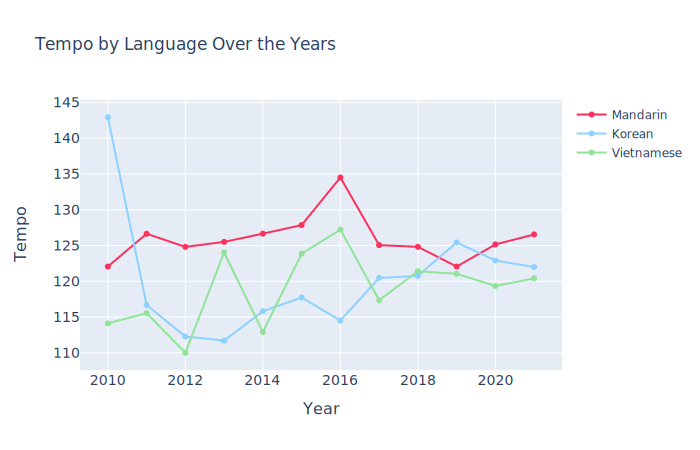

In [44]:
# Line chart - Tempo
mt = m.groupby(by='year')['tempo'].mean().reset_index()
kt = k.groupby(by='year')['tempo'].mean().reset_index()
vt = v.groupby(by='year')['tempo'].mean().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=mt['year'], 
                         y=mt['tempo'],
                         mode='lines+markers',
                         name='Mandarin',
                         line=dict(color='#fa325d', width=2)
                        ))
fig.add_trace(go.Scatter(x=kt['year'], 
                         y=kt['tempo'],
                         mode='lines+markers',
                         name='Korean',
                         line=dict(color='#8cd1ff', width=2)
                        ))
fig.add_trace(go.Scatter(x=vt['year'], 
                         y=vt['tempo'],
                         mode='lines+markers',
                         name='Vietnamese',
                         line=dict(color='#91e399', width=2)
                        ))
fig.update_layout(
    title='Tempo by Language Over the Years',
    yaxis=dict(
        title='Tempo',
        titlefont_size=16,
        tickfont_size=14,
    ),
    xaxis=dict(
        title='Year',
        titlefont_size=16,
        tickfont_size=14,
    )
)
fig.show('svg')

In 2010s, Mandopop and Vpop had more songs that have faster beat than Kpop. In 2020s, Mandopop still maintains its first place in having a higher speed in the beat, Kpop is in second place and Vpop is in the third place. 

### Duration (min)
Duration of the song in minute.

In [32]:
# copy frames to pass the SettingWithCopyWarning
mdu = m.copy()
kdu = k.copy()
vdu = v.copy()

# convert ms to min
mdu['duration_min'] = m['duration_ms'] / 60000
kdu['duration_min'] = k['duration_ms'] / 60000
vdu['duration_min'] = v['duration_ms'] / 60000

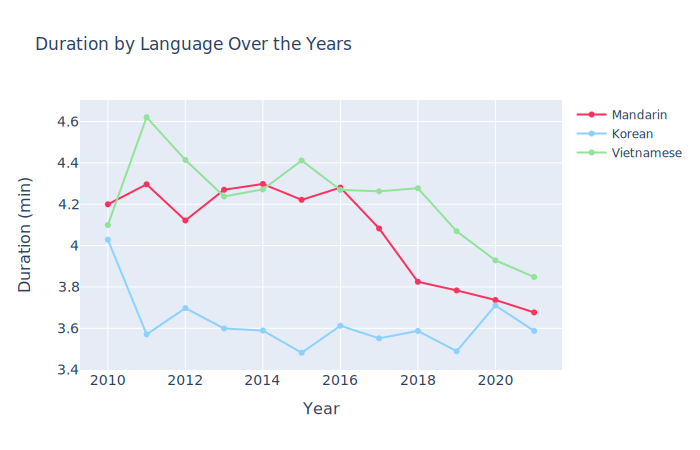

In [45]:
# Line chart - Duration(min)
mdu = mdu.groupby(by='year')['duration_min'].mean().reset_index()
kdu = kdu.groupby(by='year')['duration_min'].mean().reset_index()
vdu = vdu.groupby(by='year')['duration_min'].mean().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=mdu['year'], 
                         y=mdu['duration_min'],
                         mode='lines+markers',
                         name='Mandarin',
                         line=dict(color='#fa325d', width=2)
                        ))
fig.add_trace(go.Scatter(x=kdu['year'], 
                         y=kdu['duration_min'],
                         mode='lines+markers',
                         name='Korean',
                         line=dict(color='#8cd1ff', width=2)
                        ))
fig.add_trace(go.Scatter(x=vdu['year'], 
                         y=vdu['duration_min'],
                         mode='lines+markers',
                         name='Vietnamese',
                         line=dict(color='#91e399', width=2)
                        ))
fig.update_layout(
    title='Duration by Language Over the Years',
    yaxis=dict(
        title='Duration (min)',
        titlefont_size=16,
        tickfont_size=14,
    ),
    xaxis=dict(
        title='Year',
        titlefont_size=16,
        tickfont_size=14,
    )
)
fig.show('svg')

In 2010s, Vpop songs had a longer duration than Mandopop and Kpop songs as they were all from 4 to 4.6 minutes. Kpop songs were more faster as they were from 3.5 to 4 minutes. Mandopop songs were 3.7 to 4.3 minutes. In 2020s, the duration of songs become much shorter for all three music as they are range from 3.6 to 3.9 minutes.  